In [58]:
netlist_data = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   1.66pH fcheck
L2                 3         4   1.66pH fcheck
B1                 1         5   jjmod area=0.4
R1                 1         5   19.3ohm
B2                 2         5   jjmod area=0.4
R2                 2         5   19.3ohm
B3                 4         2   pjjmod area=20
.ends

.subckt psquid2        3  5 
L1                 3         1   1.37pH fcheck
L2                 3         4   1.37pH fcheck
B1                 1         5   jjmod area=0.36
R1                 1         5   21.43ohm
B2                 2         5   jjmod area=0.36
R2                 2         5   21.43ohm
B3                 4         2   pjjmod area=20
.ends

.subckt psquid3        3  5 
L1                 3         1   1.58pH fcheck
L2                 3         4   1.58pH fcheck
B1                 1         5   jjmod area=0.4
R1                 1         5   19.25ohm
B2                 2         5   jjmod area=0.4
R2                 2         5   19.25ohm
B3                 4         2   pjjmod area=20
.ends

.subckt psquid4        3  5 
L1                 3         1   #SQUIDL4(1.46)pH fcheck
L2                 3         4   #SQUIDL4(1.46)pH fcheck
B1                 1         5   jjmod area=#JJAREA4(v=0.32, shunt = JJSHUNT4)
R1                 1         5   #JJSHUNT4(24.5)ohm
B2                 2         5   jjmod area=#JJAREA4(v=0.32)
R2                 2         5   #JJSHUNT4(24.5)ohm
B3                 4         2   pjjmod area=#PJJAREA4(20, fix = true, dp = false)
.ends

.subckt psquid5        3  5 
L1                 3         1   #SQUIDL5(1.66)pH fcheck
L2                 3         4   #SQUIDL5(1.66)pH fcheck
B1                 1         5   jjmod area=#JJAREA5(v=0.45, shunt = JJSHUNT5)
R1                 1         5   #JJSHUNT5(17.25)ohm
B2                 2         5   jjmod area=#JJAREA5(v=0.45)
R2                 2         5   #JJSHUNT5(17.25)ohm
B3                 4         2   pjjmod area=#PJJAREA5(20, fix = true, dp = false)
.ends

.subckt psquid6        3  5 
L1                 3         1   #SQUIDL6(1.35)pH fcheck
L2                 3         4   #SQUIDL6(1.35)pH fcheck
B1                 1         5   jjmod area=#JJAREA6(v=0.36, shunt = JJSHUNT6)
R1                 1         5   #JJSHUNT6(21.72)ohm
B2                 2         5   jjmod area=#JJAREA6(v=0.36)
R2                 2         5   #JJSHUNT6(21.72)ohm
B3                 4         2   pjjmod area=#PJJAREA6(20, fix = true, dp = false)
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    1200ohm
L0                      2        3    2pH fcheck
L1                      3        0    36.92pH fcheck
X1       psquid1         3        4
L3                      4        5    4.25pH fcheck
L4                      5        6    2.00pH fcheck
R1                      100      5    97.32ohm
X2       psquid2         6        0
.ends


.subckt JTL     1  5  100
L1               1  2   14pH fcheck
L2               2  3   14pH fcheck
L3               3  4   14pH fcheck
L4               4  5   14pH fcheck
X1    psquid3     3  0
X2    psquid3     5  0
R1               100  4   129.71ohm
.ends


.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends


.subckt DFF 1 4 9 100
L1                      1  2  #DFFL1(18.6, dpv = 10)pH fcheck  
X1       psquid4        2  3
L2                      3  7  #DFFL2(2)pH fcheck

L3                      4  5  #DFFL3(13.88)pH fcheck
L4                      5  6  #DFFL3(13.88)pH fcheck
X2       psquid5        6  0
L5                      6  7  #DFFL5(29.39, dpv = 20)pH  fcheck
R1                      100  7  #DFFR1(112.5, dpv = 12)ohm
L6                      7  8  #DFFL6(31.63, dpv = 20)pH fcheck
L7                      8  9  2pH fcheck
X3       psquid6        9  0
.ends

*** top cell: 
Vin1                1       0   PWL(0ps 0mV 640ps 0mV 650ps 25mV 750ps 25mV 760ps 0mV   1040ps 0mV 1050ps 25mV 1150ps 25mV 1160ps 0mV   1440ps 0mV 1450ps 25mV 1550ps 25mV 1560ps 0mV)
X1      DCHFQ       1       2   100
X2      JTL4        2       3   100
X3      JTL4        3       4   100

Vin2                5       0   PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X4     DCHFQ       5       6   100
X5      JTL4        6       7   100
X6      JTL4        7       8   100
X7      DFF         4       8   9   100
X8      JTL4        9       10  100
X9      JTL4        10      11  100
R1                  11      13      8.32ohm
L1                  13      0       2pH fcheck
Vb                  100     0       pwl(0ps 0mV 100ps 1.13mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps


.print phase B1|X2|X1|X2
.print phase B2|X2|X1|X2

.print phase B1|X2|X1|X5
.print phase B2|X2|X1|X5

.print phase B1|X1|X1|X9
.print phase B2|X1|X1|X9

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
"""

In [59]:
netlist_data2 = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid        3  5 
L1                 3         1   #SQUIDL(1.68)pH fcheck
L2                 3         4   #SQUIDL(1.68)pH fcheck
B1                 1         5  jjmod area=#JJAREA(v=0.45, shunt = JJSHUNT)
R1                 1         5   #JJSHUNT(17.17)ohm
B2                 2         5  jjmod area=#JJAREA(v=0.45)
R2                 2         5   #JJSHUNT(17.17)ohm
B3                 4         2  pjjmod area=#PJJAREA(20, fix = true)
.ends
* ============================================

.subckt JTL     1  5  100
L1               1  2   #JTLL1(14.46)pH fcheck
L2               2  3   #JTLL1(14.46)pH fcheck
L3               3  4   #JTLL1(14.46)pH fcheck
L4               4  5   #JTLL1(14.46)pH fcheck
X1    psquid     1  0
X2    psquid     3  0
R1               100  2   #JTLR1(130.98)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
                                 PWL(0ps 0mV  600ps 0mV 601ps 0.517mV 602ps 0.517mV 603ps 0mV   800ps 0mV 801ps 0.517mV 802ps 0.517mV 803ps 0mV   1000ps 0mV 1001ps 0.517mV 1002ps 0.517mV 1003ps 0mV)
Vin1                    2    0   PWL(0ps 0mV  400ps 0mV 401ps 0.517mV 402ps 0.517mV 403ps 0mV   600ps 0mV 601ps 0.517mV 602ps 0.517mV 603ps 0mV   800ps 0mV 801ps 0.517mV 802ps 0.517mV 803ps 0mV  1000ps 0mV 1001ps 0.517mV 1002ps 0.517mV 1003ps 0mV)
X2       JTL4           2     3  100
X3       JTL4           3     4  100
X8       JTL4           4     5  100
X9       JTL4           5     6  100
X1    psquid            6     0
R1                      6     13  8.32ohm
L1                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=1.25,fix = true)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps

.print phase B1|X1|X1|X3
.print phase B2|X1|X1|X3

.print phase B1|X1|X1|X8
.print phase B2|X1|X1|X8

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
"""

In [60]:
import importlib
from optimize import data
importlib.reload(data)

d = data.Data(netlist_data, show = False)


.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   1.66pH fcheck
L2                 3         4   1.66pH fcheck
B1                 1         5   jjmod area=0.4
R1                 1         5   19.3ohm
B2                 2         5   jjmod area=0.4
R2                 2         5   19.3ohm
B3                 4         2   pjjmod area=20
.ends

.subckt psquid2        3  5 
L1                 3         1   1.37pH fcheck
L2                 3         4   1.37pH fcheck
B1                 1         5   jjmod area=0.36
R1                 1         5   21.43ohm
B2                 2         5   jjmod area=0.36
R2                 2         5   21.43ohm
B3                 4         2   pjjmod area=20
.ends

.subckt psquid3        3  5 
L1                 3         1   

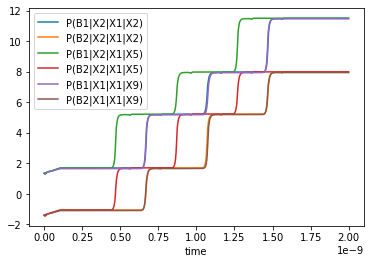

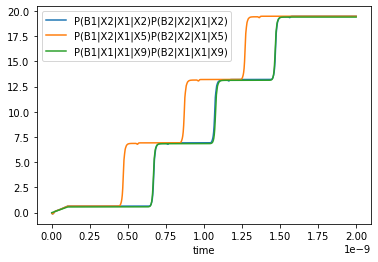

In [61]:
d.default_simulation(True)

In [62]:
from optimize import margin
importlib.reload(margin)

# res = margin.get_margins(d)
# margin.plot(res)
margin.optimize(d,'/home/tanetakumi/main/hfq-optimizer/template/optimize/opt_dff5')




ばらつき0 : 0回目の最適化開始
最小マージン :  JJAREA6    48.43750000000002
ばらつき0 : 0回目の最適化終了
ばらつき0 : 1回目の最適化開始
最小マージン :  JJAREA6    48.43750000000002
ばらつき0 : 1回目の最適化終了
ばらつき1 : 0回目の最適化開始
最小マージン :  JJAREA5    35.93750000000001
ばらつき1 : 0回目の最適化終了
ばらつき1 : 1回目の最適化開始
最小マージン :  JJAREA5    33.59375000000003
ばらつき1 : 1回目の最適化終了
ばらつき2 : 0回目の最適化開始


KeyboardInterrupt: 

In [ ]:
# margin.plot(res)